In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [164]:
df = pd.read_csv('model-making')

In [165]:
df.head()

,Unnamed: 0,gender,race,name
0,0,0,0,tashanika l abraham
1,1,0,0,denetra c adams
2,2,0,0,tomesha d adams
3,3,0,0,trellany c adams
4,4,0,0,cynthia s adderley


In [166]:
df.pop('Unnamed: 0')

0              0
1              1
2              2
3              3
4              4
5              5
6              6
7              7
8              8
9              9
10            10
11            11
12            12
13            13
14            14
15            15
16            16
17            17
18            18
19            19
20            20
21            21
22            22
23            23
24            24
25            25
26            26
27            27
28            28
29            29
           ...  
120746    120747
120747    120748
120748    120749
120749    120750
120750    120751
120751    120752
120752    120753
120753    120754
120754    120755
120755    120756
120756    120757
120757    120758
120758    120759
120759    120760
120760    120761
120761    120762
120762    120763
120763    120764
120764    120765
120765    120766
120766    120767
120767    120768
120768    120769
120769    120770
120770    120771
120771    120772
120772    120773
120773    1207

In [167]:
X = df['name']
Y = df['race']
X = pd.DataFrame(X)

In [168]:
from keras.preprocessing.text import Tokenizer

In [169]:
max_features = 100000
tokenzer = Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', split=' ', lower=True, char_level=False, oov_token=None)

In [170]:
tokenzer.fit_on_texts(X)

In [171]:
X = tokenzer.texts_to_sequences(X)

In [152]:
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X, maxlen=50000)

In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X

/home/shivam/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [154]:
from sklearn.decomposition import PCA

In [161]:
pca = PCA(n_components=20000)

/home/shivam/.conda/envs/my_root/lib/python3.6/site-packages/sklearn/decomposition/pca.py:423: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)


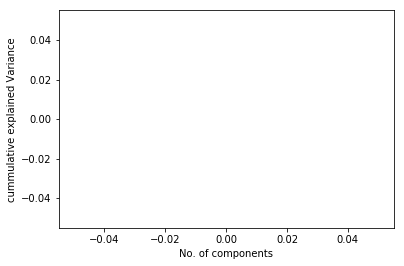

In [162]:
pca.fit(X)
X_pca = pca.transform(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("No. of components")
plt.ylabel("cummulative explained Variance");